# King County Dataset Linear Regression Model 14

### Adjustments for this model:
    Start with getting rid of 'id',
    Then deal with the NaN's in 'view', 'yr_renovated', 'waterfront', and 'sqft_basement'
    Change "?" in 'sqft_basement'
    Take care of outlier in bedrooms
    Deal with the date feature
    Bin: 'view', 'grade', 'sqft_basement', 'yr_renovated', 'waterfront', 'condition'
    Lot Transform: 'sqft_above', 'sqft_living','sqft_lot', 'sqft_living15', 'sqft_lot15' are skewed right.
    Max/Min: 
    Standardization: 'sqft_above', 'sqft_living','sqft_lot','sqft_living15', 'sqft_lot15'
   

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [3]:
# Change "?" in 'sqft_basement' to '0';
data.sqft_basement = data.sqft_basement.replace(to_replace = '?', value = '0')

In [4]:
# Account for missing data in 'waterfront', 'view', 'yr_renovated';
data.waterfront.fillna(value=data.waterfront.median(), inplace = True)
data.view.fillna(value=data.view.median(), inplace = True)
data.yr_renovated.fillna(value=data.yr_renovated.median(), inplace = True)
data.sqft_basement.fillna(value=data.sqft_basement.median(), inplace = True)


In [5]:
# Change outlier '33' to '3' in 'bedrooms';
data.at[15856,'bedrooms'] = 3

In [6]:
#Old version.  Still not working!
####import datetime as dt
####data['date'] = pd.to_datetime(data.date)

In [7]:
# Change 'date' feature to float;
import datetime as dt

#Run this code first and then change it!
data["date"] = pd.to_datetime(data["date"], format = "%m/%d/%Y")

# I want day first, but it won't work this way.
#data["date"] = pd.to_datetime(data["date"], format = "%d/%m/%Y")

(array([2326., 2940., 2589., 2242., 2247., 1926., 1294., 1704., 2670.,
        1659.]),
 array([735355., 735394., 735433., 735472., 735511., 735550., 735589.,
        735628., 735667., 735706., 735745.]),
 <a list of 10 Patch objects>)

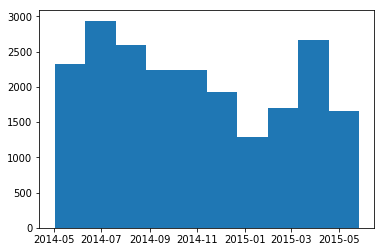

In [8]:
plt.hist(data.date)

In [9]:
# Change 'sqft_basement' from an object to a float:
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [10]:
data = data.drop(["id"], axis=1)

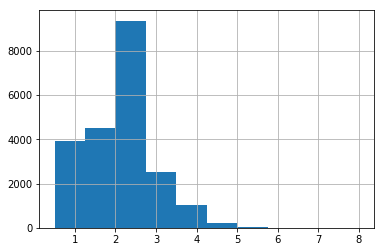

In [11]:
data.bathrooms.hist()

In [12]:
data.bathrooms.describe()

count    21597.000000
mean         2.115826
std          0.768984
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

In [13]:
data.loc[data["bathrooms"] == 8]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,2014-10-13,7700000.0,6,8.0,12050,27600,2.5,0.0,3.0,4,13,8570,3480.0,1910,1987.0,98102,47.6298,-122.323,3940,8800
12764,2014-05-05,2280000.0,7,8.0,13540,307752,3.0,0.0,4.0,3,12,9410,4130.0,1999,0.0,98053,47.6675,-121.986,4850,217800


Text(0.5, 1.0, 'sqft_lot15')

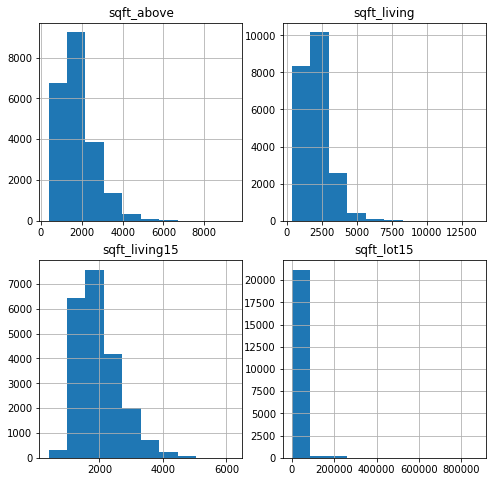

In [14]:
new_figure = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1)
data.sqft_above.hist(ax=ax1)
ax1.set_title("sqft_above")

ax2 = plt.subplot(2, 2, 2)
data.sqft_living.hist(ax=ax2)
ax2.set_title('sqft_living')

ax3 = plt.subplot(2, 2, 3)
data.sqft_living15.hist(ax=ax3)
ax3.set_title("sqft_living15")

ax4 = plt.subplot(2, 2, 4)
data.sqft_lot15.hist(ax=ax4)
ax4.set_title('sqft_lot15')

In [15]:
# Drop 'bathrooms' that are greater than '7'
data = data[data.bathrooms != 8]
data = data[data.bathrooms != 7.75]
data = data[data.bathrooms != 7.5]

In [16]:
data = data[data.bathrooms < 7]

In [17]:
data.bathrooms.std()*4 + data.bathrooms.mean()

5.175294995132291

In [18]:
len(data.loc[data["bathrooms"] > 6])

6

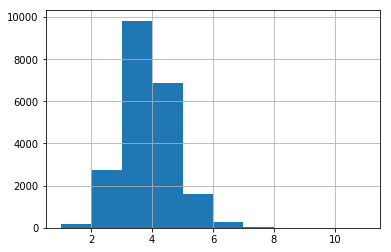

In [19]:
data.bedrooms.hist()

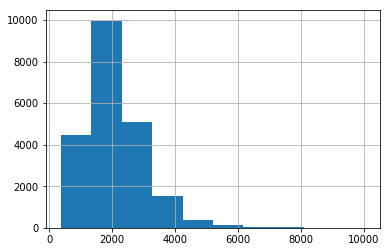

In [20]:
data.sqft_living.hist()

In [21]:
data.sqft_living.mean()

2078.8765340619643

In [22]:
data.sqft_living.std()

910.7047581836571

In [23]:
data.sqft_living.std()*3

2732.1142745509715

In [24]:
data.sqft_living.mean() + data.sqft_living.std()*3

4810.990808612936

In [25]:
len(data.loc[data["sqft_living"] > 4810.99])

250

In [26]:
data = data[data.sqft_living < 4810.99]

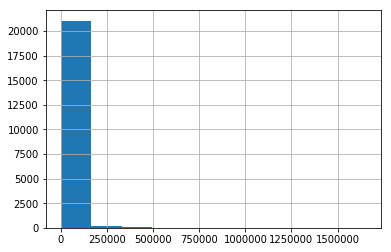

In [27]:
data.sqft_lot.hist()

In [28]:
data.sqft_lot.mean()

14650.025488450547

In [29]:
# Three standard deviations is about a half acre
data.sqft_lot.std()*3

119992.20986927726

In [30]:
data.sqft_lot.mean()+data.sqft_lot.std()*4

174639.6386474869

In [31]:
# Number of homes that have more than a 1 acre lot or 43560 sqft.
len(data.loc[data["sqft_lot"] > 178066])

270

In [32]:
data = data[data.sqft_lot < 178066]

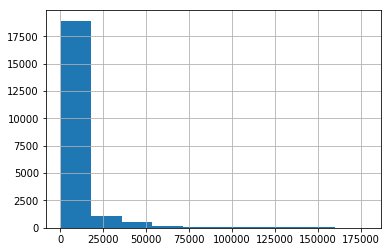

In [33]:
data.sqft_lot.hist()

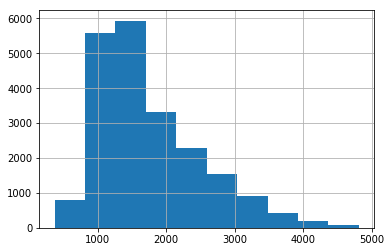

In [34]:
data.sqft_above.hist()

In [35]:
data.sqft_above.describe()

count    21073.00000
mean      1746.40075
std        756.35853
min        370.00000
25%       1180.00000
50%       1540.00000
75%       2168.00000
max       4810.00000
Name: sqft_above, dtype: float64

In [36]:
data.sqft_above.std()*3

2269.075588534078

In [37]:
data.sqft_above.mean()+data.sqft_above.std()*4

4771.834867820031

In [38]:
len(data.loc[data["sqft_above"] > 4938])

0

In [39]:
data = data[data.sqft_above < 4938]

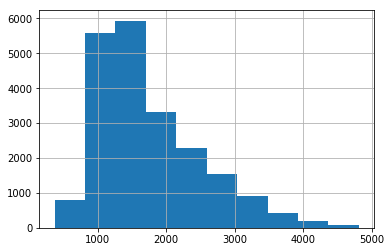

In [40]:
data.sqft_above.hist()

In [41]:
data.yr_built.unique()

array([1955, 1951, 1933, 1965, 1987, 1995, 1963, 1960, 2003, 1942, 1927,
       1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985, 1941,
       1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000, 1984,
       2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973, 1925,
       1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006, 1988,
       2001, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1908, 1931, 1998, 1913, 2013, 1907, 1958,
       2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970, 1982,
       2015, 1934, 1938, 1919, 1906, 1935])

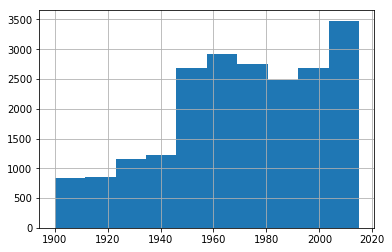

In [42]:
# Left skewed.
data.yr_built.hist()

In [43]:
data.yr_built.mean()-data.yr_built.std()*3

1882.447103179619

In [44]:
# Left skewed?  Do I need to normalize this?

In [45]:
data.yr_renovated.describe()

count    21073.000000
mean        68.383619
std        363.078582
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

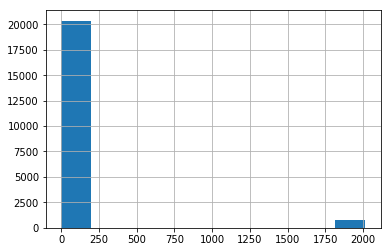

In [46]:
data.yr_renovated.hist()

In [47]:
data.yr_renovated.describe()

count    21073.000000
mean        68.383619
std        363.078582
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

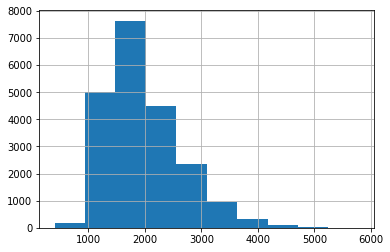

In [48]:
data.sqft_living15.hist()

In [49]:
data.sqft_living15.mean()+data.sqft_living15.std()*3

3930.0797495207435

In [50]:
len(data.loc[data["sqft_living15"] > 3944.71])

190

In [51]:
# Let's get rid of the outliers
data = data[data.sqft_living15 < 3944.71]

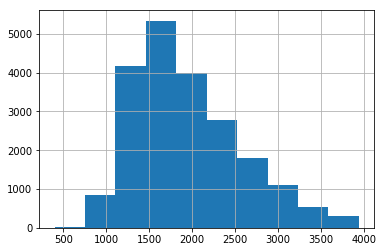

In [52]:
data.sqft_living15.hist()

In [53]:
data.sqft_lot15.std()*3

50270.05553460968

In [54]:
data.sqft_lot15.mean()+data.sqft_lot15.std()*3

60747.91082360073

In [55]:
len(data.loc[data["sqft_lot15"] >60726.64])

273

In [56]:
# Let's get rid of the outliers
data = data[data.sqft_lot15 < 60726.64]

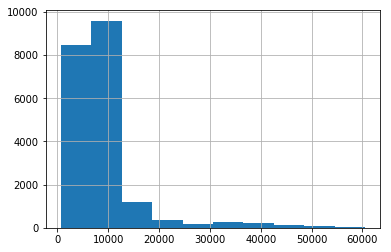

In [57]:
data.sqft_lot15.hist()

Text(0.5, 1.0, 'sqft_lot15')

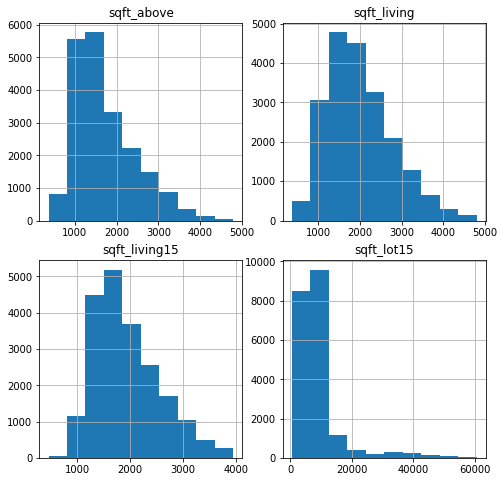

In [58]:
new_figure = plt.figure(figsize=(8,8))

ax1 = plt.subplot(2, 2, 1)
data.sqft_above.hist(ax=ax1)
ax1.set_title("sqft_above")

ax2 = plt.subplot(2, 2, 2)
data.sqft_living.hist(ax=ax2)
ax2.set_title('sqft_living')

ax3 = plt.subplot(2, 2, 3)
data.sqft_living15.hist(ax=ax3)
ax3.set_title("sqft_living15")

ax4 = plt.subplot(2, 2, 4)
data.sqft_lot15.hist(ax=ax4)
ax4.set_title('sqft_lot15')

In [59]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.061000e+04,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000,20610.000000
mean,5.146591e+05,3.351140,2.075085,2004.769481,10057.358806,1.485129,0.005434,0.206405,3.414508,7.585007,1724.329258,274.742310,1970.363804,68.470160,98079.413003,47.561585,-122.220317,1935.756817,9016.355798
std,2.993957e+05,0.892271,0.722539,791.342661,12052.266439,0.540072,0.073519,0.717646,0.652331,1.081240,731.947719,417.032738,29.450133,363.308398,53.798498,0.138142,0.136590,617.328729,7833.532847
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000
25%,3.180000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1180.000000,0.000000,1951.000000,0.000000,98033.000000,47.473800,-122.331000,1470.000000,5001.000000
50%,4.450000e+05,3.000000,2.250000,1880.000000,7454.000000,1.000000,0.000000,0.000000,3.000000,7.000000,1530.000000,0.000000,1973.000000,0.000000,98072.000000,47.573500,-122.242000,1810.000000,7500.000000
75%,6.250000e+05,4.000000,2.500000,2480.000000,10086.750000,2.000000,0.000000,0.000000,4.000000,8.000000,2130.000000,530.000000,1996.000000,0.000000,98118.000000,47.679275,-122.136000,2310.000000,9720.000000
max,3.400000e+06,11.000000,6.000000,4800.000000,177657.000000,3.500000,1.000000,4.000000,5.000000,12.000000,4790.000000,2300.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,3940.000000,60548.000000


//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


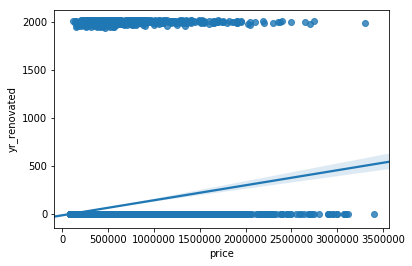

In [60]:
import seaborn as sns
sns.regplot(x="price", y="yr_renovated", data=data)

In [61]:
#import statsmodels.api as sm
#import numpy as np
#import matplotlib.pyplot as plt

#Y = pd.DataFrame(data, columns = ['price'])
#X = data.drop(["price"], axis=1)

#results = sm.OLS(Y, X)

#results

#plt.scatter(X,Y)

#X_plot = np.linspace(0,1,100)
#plt.plot(X_plot, X_plot*results.params[0] + results.params[1])

#plt.show()

In [62]:
# 20 x 20 grid of 400 plots!  Takes a while
#sns.pairplot(data)

In [63]:
#import seaborn as sns
#for col in data.columns:
#    sns.regplot(x="price", y=col, data=data) 

In [64]:
#import seaborn as sns
#for col in data.columns:
#    sns.lmplot(x=data['price'], y=col, data=data, fit_reg=True) 

In [65]:
#import seaborn as sns
#sns.regplot(x="price", y="bedrooms", data=data)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


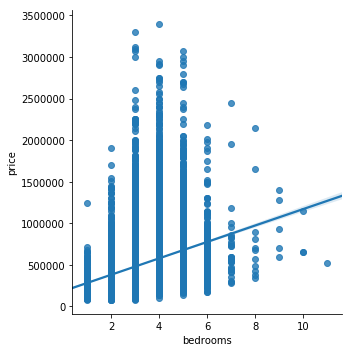

In [66]:
sns.lmplot( x='bedrooms', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


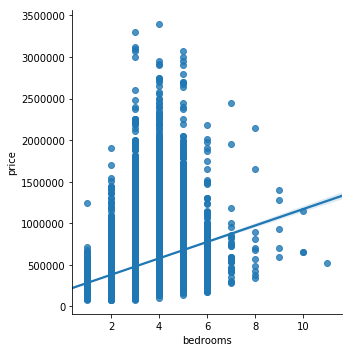

In [67]:
sns.lmplot( x='bedrooms', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


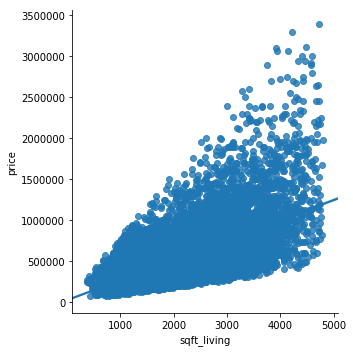

In [68]:
sns.lmplot( x='sqft_living', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


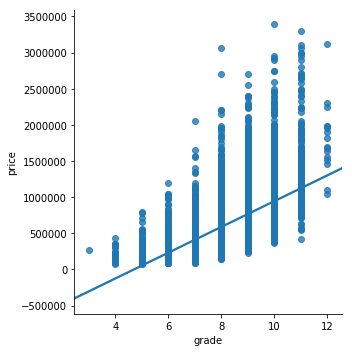

In [69]:
sns.lmplot( x='grade', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


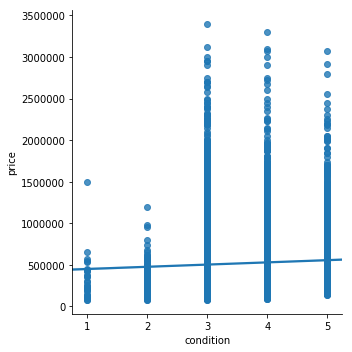

In [70]:
sns.lmplot( x='condition', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


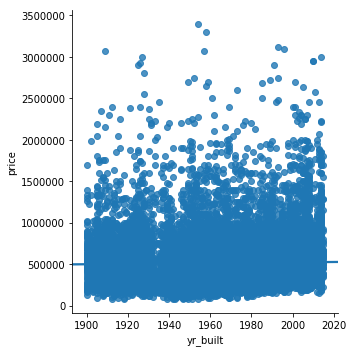

In [71]:
sns.lmplot( x='yr_built', y='price', data=data, fit_reg=True) 

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


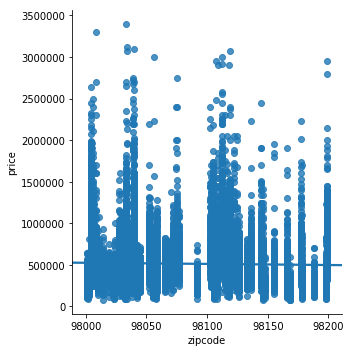

In [72]:
sns.lmplot( x='zipcode', y='price', data=data, fit_reg=True) 

In [110]:
#for xcol in data.columns:
#    sns.lmplot( x=xcol, y='price', data=data, fit_reg=True) 
    
  

In [73]:
# Create bins for 'yr_renovated' based on the values observed. 4 values will result in 3 bins
bins_A = [0, 1900, 1990, 2000, 2008, 2015]
bins_yr_renovated = pd.cut(data['yr_renovated'], bins_A)
#bins_yr_renovated = bins_yr_renovated.as_unordered()


yr_renovated_dummy = pd.get_dummies(bins_yr_renovated, prefix="yr_ren")
data = data.drop(["yr_renovated"], axis=1)
data = pd.concat([data, yr_renovated_dummy], axis=1)

In [74]:
# Create bins for 'sqft_basement' based on the values observed. 3 values will result in 2 bins
bins_B = [0, 100, 5000]
bins_sqft_basement = pd.cut(data['sqft_basement'], bins_B)

sqft_basement_dummy = pd.get_dummies(bins_sqft_basement, prefix="sqft_base", drop_first=True)
data = data.drop(["sqft_basement"], axis=1)
data = pd.concat([data, sqft_basement_dummy], axis=1)

In [75]:
# Create bins for 'view' based on the values observed. 3 values will result in 2 bins
bins_C = [0, 2, 4]
bins_view = pd.cut(data['view'], bins_C)

view_dummy = pd.get_dummies(bins_view, prefix="new_view", drop_first=True)
data = data.drop(["view"], axis=1)
data = pd.concat([data, view_dummy], axis=1)

In [76]:
# Create bins for 'grade' based on the values observed. 4 values will result in 3 bins
bins_D = [0, 5, 7, 13]
bins_grade = pd.cut(data['grade'], bins_D)

grade_dummy = pd.get_dummies(bins_grade, prefix="new_grade", drop_first=True)
data = data.drop(["grade"], axis=1)
data = pd.concat([data, grade_dummy], axis=1)

In [77]:
# Create bins for 'waterfront' based on the values observed. 3 values will result in 2 bins
bins_E = [0, 0.5, 1]
bins_waterfront = pd.cut(data['waterfront'], bins_E)

waterfront_dummy = pd.get_dummies(bins_waterfront, prefix="new_waterfront", drop_first=True)
data = data.drop(["waterfront"], axis=1)
data = pd.concat([data, waterfront_dummy], axis=1)

In [78]:
# Create bins for 'condition' based on the values observed. 4 values will result in 3 bins
bins_G = [0, 3, 4, 5]
bins_condition = pd.cut(data['condition'], bins_G)

condition_dummy = pd.get_dummies(bins_condition, prefix="new_condition", drop_first=True)
data = data.drop(["condition"], axis=1)
data = pd.concat([data, condition_dummy], axis=1)

### Log Transformation: These features have right skewed histograms
'sqft_above', 'sqft_lot', 'sqft_living', 'sqft_living15', 'sqft_lot15'

In [79]:
# Perform log transformation
logabove = np.log(data["sqft_above"])
loglot = np.log(data["sqft_lot"])
logliving = np.log(data["sqft_living"])
loglivingnear = np.log(data["sqft_living15"])
loglotnear = np.log(data["sqft_lot15"])

# Copy the Standardizations into the dataset
data["sqft_above"] = (logabove-np.mean(logabove))/np.sqrt(np.var(logabove))
data["sqft_lot"] = (loglot-np.mean(loglot))/np.sqrt(np.var(loglot))
data["sqft_living"] = (logliving-np.mean(logliving))/np.sqrt(np.var(logliving))
data["sqft_living15"] = (loglivingnear-np.mean(loglivingnear))/np.sqrt(np.var(loglivingnear))
data["sqft_lot15"] = (loglotnear-np.mean(loglotnear))/(np.sqrt(np.var(loglotnear)))


In [116]:
y = pd.DataFrame(data, columns = ['price'])
X = data.drop(["price", "zipcode", 'date', 'floors'], axis=1)

In [117]:
import statsmodels.api as sm
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     9132.
Date:                Sun, 20 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:59:34   Log-Likelihood:            -2.7970e+05
No. Observations:               20610   AIC:                         5.594e+05
Df Residuals:                   20590   BIC:                         5.596e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
bedrooms                  -2.644e+04   1989.272    -13.289      0.000   -3.03e+04   -2.25e+04
bathrooms                  6.204e+04   3199.564     19.391      0.000    5.58e+04    6.83e+04
sqft_living                2.604e+04   5366.461      4.853      0.000    1.55e+04    3.66e+04
sqft_lot                  -1.292e+04   3210.968     -4.024      0.000   -1.92e+04   -6625.742
sqft_above                 9.437e+04   5092.519     18.532      0.000    8.44e+04    1.04e+05
yr_built                  -2789.7249     61.013    -45.724      0.000   -2909.315   -2670.135
lat                        5.457e+05   9607.372     56.801      0.000    5.27e+05    5.65e+05
long                       1.643e+05   3942.475     41.670      0.000    1.57e+05    1.72e+05
sqft_living15              4.902e+04   2138.989     22.916      0.000    4.48e+04    5.32e+04
sqft_lot15                -1.424e+04   3198.855     -4.452      0.000   -2.05e+04   -7971.340
yr_ren_(0, 1900]           7.598e-11   7.18e-12     10.578      0.000    6.19e-11    9.01e-11
yr_ren_(1900, 1990]       -4.044e+04   1.28e+04     -3.158      0.002   -6.55e+04   -1.53e+04
yr_ren_(1990, 2000]        7.159e+04   1.63e+04      4.389      0.000    3.96e+04    1.04e+05
yr_ren_(2000, 2008]        1.277e+05    1.5e+04      8.524      0.000    9.83e+04    1.57e+05
yr_ren_(2008, 2015]        7.134e+04   1.49e+04      4.777      0.000    4.21e+04    1.01e+05
sqft_base_(100, 5000]       6.96e+04   5590.731     12.450      0.000    5.86e+04    8.06e+04
new_view_(2, 4]            2.245e+05   8355.823     26.864      0.000    2.08e+05    2.41e+05
new_grade_(7, 13]          9.497e+04   3656.423     25.972      0.000    8.78e+04    1.02e+05
new_waterfront_(0.5, 1.0]  5.357e+05   1.97e+04     27.261      0.000    4.97e+05    5.74e+05
new_condition_(3, 4]       2.916e+04   3306.763      8.818      0.000    2.27e+04    3.56e+04
new_condition_(4, 5]       6.676e+04   5315.016     12.561      0.000    5.63e+04    7.72e+04
==============================================================================
Omnibus:                    11787.997   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           189580.473
Skew:                           2.425   Prob(JB):                         0.00
Kurtosis:                      17.044   Cond. No.                     3.28e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.46e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [90]:
# Perform a train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

15457 5153 15457 5153


In [91]:
# Apply your model to the train set
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)
LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

# Calculate training and test residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [93]:
#Calculate the Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)

print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 33801124925.53531
Test Mean Squarred Error: 37997411575.49734


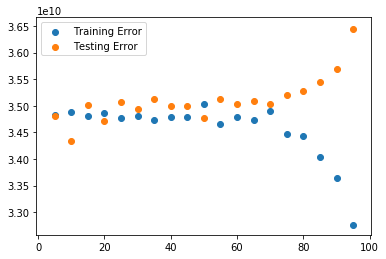

In [94]:
#Evaluate the effect of train-test split 
import random
random.seed(8)
train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(100):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

In [95]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results  = np.mean(cross_val_score(linreg, X, y, cv=5,  scoring='neg_mean_squared_error'))
cv_5_results

-35301532383.64638

## Results

###### R-squared: 0.888 !  The P value looks better as well as the test-train split.

In [108]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring='neg_mean_squared_error')
cv_5_results

array([-3.19000651e+10, -3.39178698e+10, -3.00861216e+10, -3.73913297e+10,
       -4.32122757e+10])

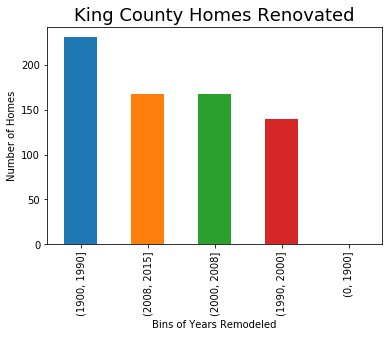

In [96]:
bins_yr_renovated.value_counts().plot(kind='bar')
plt.xlabel('Bins of Years Remodeled')
plt.ylabel('Number of Homes')
plt.title("King County Homes Renovated", fontsize=18)
plt.show()

In [97]:
bins_yr_renovated.value_counts()

(1900, 1990]    231
(2008, 2015]    168
(2000, 2008]    168
(1990, 2000]    140
(0, 1900]         0
Name: yr_renovated, dtype: int64

In [98]:
bins_yr_renovated.describe()

count              707
unique               4
top       (1900, 1990]
freq               231
Name: yr_renovated, dtype: object

In [107]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'sqft_above',
       'yr_built', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'yr_ren_(0, 1900]', 'yr_ren_(1900, 1990]', 'yr_ren_(1990, 2000]',
       'yr_ren_(2000, 2008]', 'yr_ren_(2008, 2015]', 'sqft_base_(100, 5000]',
       'new_view_(2, 4]', 'new_grade_(7, 13]', 'new_waterfront_(0.5, 1.0]',
       'new_condition_(3, 4]', 'new_condition_(4, 5]'],
      dtype='object')

In [99]:
# Use feature ranking to select the 5 most important features
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 5)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False,  True, False, False,  True, False,
        True, False, False])

In [ ]:
# Top 5 columns 
'lat', 'long', 'renovated recently 2000-2008' 'view of 2 or 3', 'new_waterfront'

In [100]:
#Fit the linear regression model again using the 5 selected columns
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [103]:
# Predict the y_hat
yhat = linreg.predict(X[selected_columns])
yhat

array([[448695.39688349],
       [607215.26562174],
       [635035.18851219],
       ...,
       [508679.21223361],
       [498534.89764534],
       [508437.87549305]])

In [105]:
# Compare and contrast two models with the R-squared and adjusted R-squared
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)
print(r_squared)
print(adjusted_r_squared)

price    0.252406
dtype: float64
price    0.252225
dtype: float64


In [ ]:
# Not much difference!